# Big Data Analytics Projekt: Online-Marketing

### <b>Executors: Daniel, Oscama, Sina </b>

In diesem Projekt geht es um Daten aus dem Bereich Online-Marketing. Auf Websites werden Werbebanner geschaltet, die Besucher auf Produktseiten locken sollen. Diese Werbung kostet Geld und deshalb ist es wichtig für die Unternehmen,  die auf diesem Weg Marketing betreiben wollen, den Erfolg dieser Werbemaßnahmen einschätzen zu können. Es bieten sich eine Reihe von Metriken an, um eine solche Bewertung vorzunehmen. Die "Click-Through-Rate" (CTR) misst zunächst einmal schlicht, wie oft auf eine Werbung geklickt wurde relativ zur Geamtzahl der "Ad Impressions". Die "Conversion Rate" geht einen Schritt weiter und bezieht dann noch ein, wie oft ein Klick zu einem tatsächlichen Kauf geführt hat.<br>
Der zu bearbeitende Datensatz, den Sie im Datenaustausch-Ordner finden ("advertising.csv"), enthält verschiedene Nutzerdaten und als entscheidendes Label die Spalte "Click on Ad", die uns sagt, ob ein Besucher auf eine Werbung geklickt hat (1) oder nicht (0).

Der Datensatz beinhaltet folgende Eigenschaften:

* 'Daily Time Spent on Site': Zeit auf der Website in Minuten
* 'Age': Alter in Jahren
* 'Area Income': Durchschnittliches Einkommen der Region des Nutzers
* 'Daily Internet Usage': Durchschnittliche Minutenzahl, die der Nutzer täglich im Internet verbringt
* 'Ad Topic Line': Überschrift der Werbung
* 'City': Stadt des Nutzers
* 'Male': Ob der Nutzer männlich ist (1) oder nicht (0)
* 'Country': Land des Nutzers
* 'Timestamp': Zeit, zu der der Nutzer auf die Werbung geklickt oder das Fenster geschlossen hat
* 'Clicked on Ad': Ob der Nutzer gelickt hat (1) oder nicht (0)

### Ausgangslage

Sie sind ein(e) Unternehmensberater(in) , der von einem Kunden beauftragt wurde, auf Basis der vorliegenden Daten aus dem Online-Marketing eine Analyse durchzuführen, um den Erfolg von Werbebannern dieser Firma einzuschätzen. Der Auftraggeber möchte wissen, welche Merkmale seiner potenziellen Kunden eine Rolle spielen und welche Merkmalsausprägungen zu Clicks führen. Am Ende wünscht er natürlich auch eine Beratung, wie er in Zukunft vorgehen soll.

### Aufgabenstellung

Sie sollen anhand der vorliegenden Daten zu Nutzereigenschaften eine Klassifikation (__logistische Regression__) vornehmen, sodass Sie für zukünftige Nutzer vorhersagen können, ob der betreffende Nutzer klicken wird oder nicht. Auf der Basis könnte man dann Veränderungen an der Werbemaßnahme vornehmen und sie auf die Besucher zuschneiden.<br>
Sie führen zunächst eine Exploration der Daten durch und verschaffen sich einen Überblick, ob die notwendige Datenqualität gegeben ist. An dieser Stelle wären dann geeignete Änderungen (Dummy-Codierung o.ä.) vorzunehmen. Sie visualisieren die Daten, um Beziehungen zwischen den Merkmalen einschätzen zu können. Darauf bereiten Sie Ihre Daten für das Training des Klassifikationsmodells vor (Trainings- und Testdaten, keine CV!). Eine Standardisierung müssen Sie nicht vornehmen. Das Modell wird trainiert und auf die Testdaten angewendet. Validieren Sie das Modell mit einem Klassifikationsreport und formulieren Sie die von Ihnen im Laufe der Untersuchung gewonnen Erkenntnisse. Machen Sie ggf. Vorschläge, was das Unternehmen für die Zukunft verbessern kann.<br>

### Importe

Nehmen Sie hier typische Importe vor oder bündeln Sie hier gerne auch alle notwendigen Importe für dieses Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#installation
!pip install pycountry-convert

### Datensatz laden

#### Aufgabe

Lesen Sie die advertising.csv in ein DataFrame ein, das Sie bitte geeignet bezeichnen.

In [3]:
df = pd.read_csv("./Advertising.csv",parse_dates=["Timestamp"])

#### Aufgabe

Lassen Sie sich den Kopf des DataFrames anzeigen.

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Verschaffen Sie sich einen Überblick über die Missing Values.**

In [5]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are **no missing values** in the dataset.

##### Add new Columns to dataset

Add a new column containing the Weekday extracted from the User timestamp.

In [6]:
df['Weekday'] = df['Timestamp'].dt.day_name().astype('category')

In [7]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Sunday
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Monday
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Sunday
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Sunday
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Friday


Add a new column containing the part of the day(Morning, Afternoon, Evening, Night) extracted from the User timestamp.

In [8]:
# Helper function
def get_part_of_day(hour):
    '''
    Decide about the part of the day (Morning, Afternoon, Evening, Night), given a datetime hour object
    
    Args:
        hour(Obj: datetime hour object): The hour at which the user clicked on the Ad or closed the browser window
    '''
    return (
        "Morning" if 6 <= hour <= 12
        else
        "Afternoon" if 12 < hour <= 18
        else
        "Evening" if 18 < hour <= 22
        else
        "Night"
    )

In [9]:
df['SessionTime'] = df['Timestamp'].dt.hour.apply(get_part_of_day).astype('category')

In [10]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,SessionTime
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Sunday,Night
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Monday,Night
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Sunday,Evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Sunday,Night
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Friday,Night


In [11]:
from pycountry_convert import convert_continent_code_to_continent_name,country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3

#function to convert to alpah2 country codes and continents
def get_continent(country_name):
    '''
    Convert country name to continent
    
    Args:
        country_name(Obj: String): Country name
    '''
    try:
       country_alpha2 = country_name_to_country_alpha2(country_name,cn_name_format="default")
    except:        
        country_alpha2 = 'Unknown' 
    try:
        country_continent_code = country_alpha2_to_continent_code(country_alpha2)
    except:
        cn_continent = 'Unknown' 
    try:
        country_continent_name = convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'Unknown' 
    return country_continent_name

In [12]:
df['Continent'] = df['Country'].apply(lambda x: get_continent(x)).astype('category')

In [13]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,SessionTime,Continent
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Sunday,Night,Africa
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Monday,Night,Oceania
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Sunday,Evening,Europe
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Sunday,Night,Europe
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Friday,Night,Europe


**Verschaffen Sie sich einen Überblick über Datentypen, Skalenniveaus und typische Werte der Merkmalsausprägungen mit deskriptiver Statistik.**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Weekday                   1000 non-null   category      
 11  SessionTime               1000 non-null   category      
 12  Continent            

In [15]:
df.describe(include='all') # ,datetime_is_numeric=True

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,SessionTime,Continent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN,7,4,8
top,NaN,NaN,NaN,NaN,Networked asymmetric infrastructure,Williamsport,NaN,Czech Republic,2016-01-31 05:12:44,NaN,Sunday,Morning,Asia
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN,159,294,211
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 02:52:10,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-24 00:22:16,NaN,NaN,NaN,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000,NaN,NaN,NaN
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025,NaN,NaN,NaN
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN


### Explorative Datenanalyse

Verwenden Sie zunächst Seaborn, um sich die Daten zu visualisieren. Gerne können Sie zusätzlich Plots mit Matplotlib durchführen.

#### Aufgabe

Erstellen Sie ein Histogramm oder einen Verteilungsplot für das Alter der Nutzer ('Age').

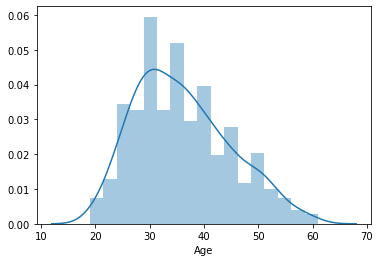

In [16]:
sns.distplot(df['Age']);

#### Aufgabe

Erstellen Sie einen Jointplot, der "Area Income" mit "Age" vergleicht.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


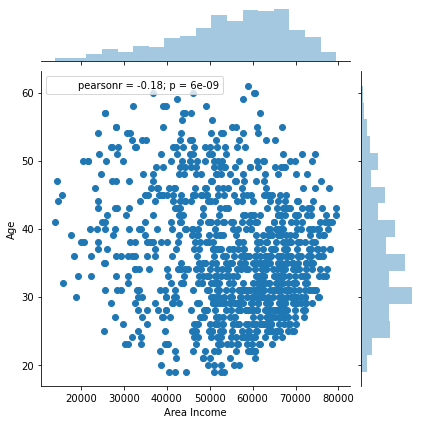

In [17]:
sns.jointplot(x="Area Income",y="Age",data=df,kind="scatter", stat_func= stats.pearsonr);

#### Aufgabe

Erstellen Sie einen Jointplot, der die KDE-Verteilung von "Daily Time Spent on Site" gegen "Age" aufzeichnet.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


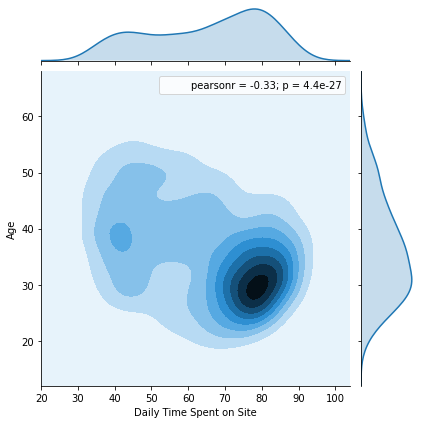

In [18]:
sns.jointplot(x="Daily Time Spent on Site",y="Age",
              data=df,kind="kde", stat_func= stats.pearsonr);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


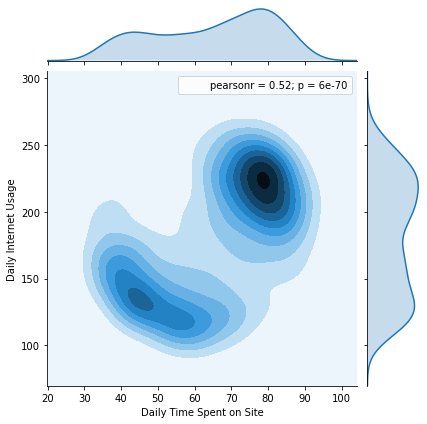

In [19]:
sns.jointplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'], kind= 'kde', stat_func= stats.pearsonr);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


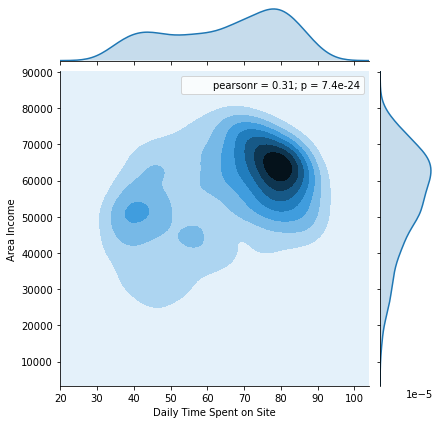

In [20]:
sns.jointplot(df['Daily Time Spent on Site'], df['Area Income'], kind= 'kde', stat_func= stats.pearsonr);

#### Aufgabe

Erstellen Sie ähnliche weitere Plots nach eigenem Ermessen.

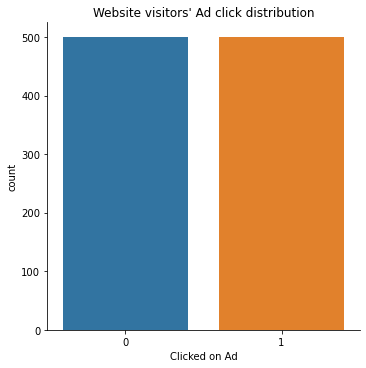

In [21]:
sns.catplot(x="Clicked on Ad",data=df, kind="count").set(title="Website visitors' Ad click distribution");

The numbe of user who clicked on Ad is equal to the number of users who didn't

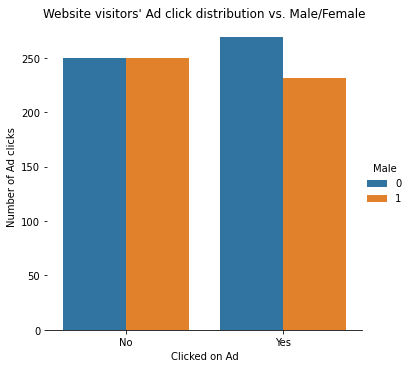

In [22]:
g = sns.catplot(x="Clicked on Ad", hue="Male",data=df, kind="count");

(g.set_axis_labels("Clicked on Ad", "Number of Ad clicks")
  .set_xticklabels(["No", "Yes"])
  .set(title="Website visitors' Ad click distribution vs. Male/Female")
  .despine(left=True));

- The number of users who didn't click on Ad is equally distributed between Male and Female
- The number of Females who clicked on Ad is slightly higher than Males

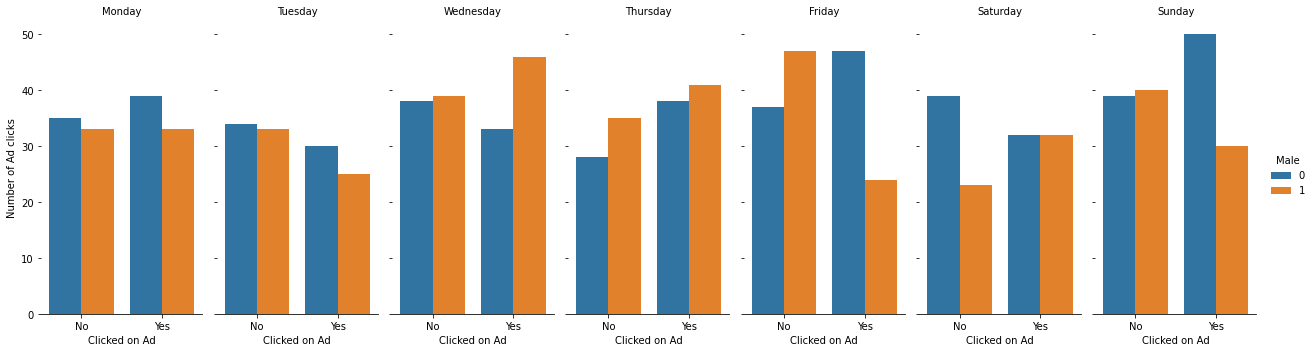

In [23]:
g = sns.catplot(x="Clicked on Ad", hue="Male", col="Weekday", col_wrap=7,
            col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                data=df, kind="count",aspect=0.5);

(g.set_axis_labels("Clicked on Ad", "Number of Ad clicks")
  .set_xticklabels(["No", "Yes"])
  .set_titles("{col_name}")
  .despine(left=True));

# plt.savefig('Weekday_vs_clicked.png', dpi=300)

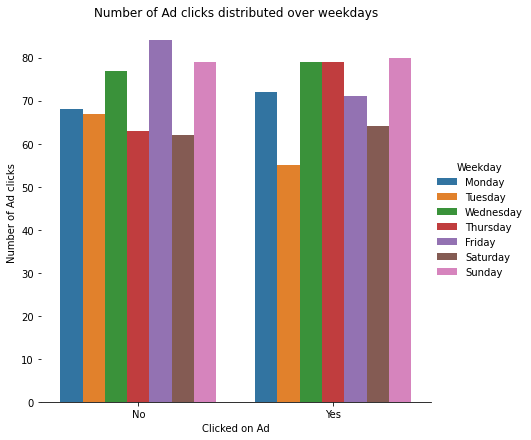

In [24]:
g = sns.catplot(x="Clicked on Ad", hue="Weekday",
            hue_order=['Monday','Tuesday','Wednesday',
                       'Thursday','Friday','Saturday','Sunday'],
                data=df, kind="count",height=6.0);
(g.set_axis_labels("Clicked on Ad", "Number of Ad clicks")
  .set_xticklabels(["No", "Yes"])  
  .set(title="Number of Ad clicks distributed over weekdays")
  .despine(left=True));

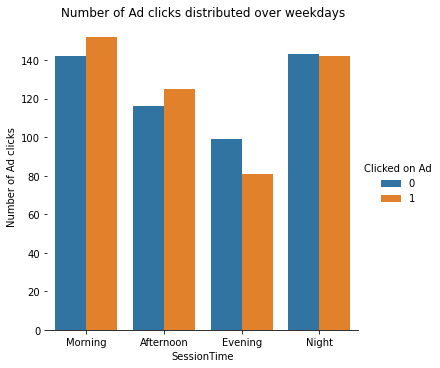

In [25]:
g = sns.catplot(x="SessionTime", hue="Clicked on Ad",
            order=['Morning','Afternoon','Evening','Night'],
                data=df, kind="count");

(g.set_axis_labels("SessionTime", "Number of Ad clicks")  
  .set(title="Number of Ad clicks distributed over weekdays")
  .despine(left=True));

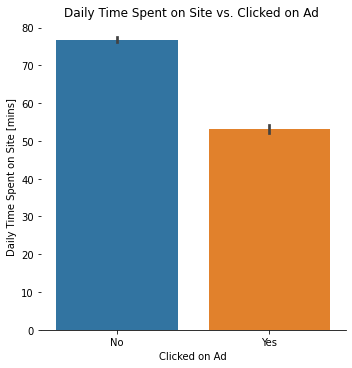

In [26]:
g = sns.catplot(x="Clicked on Ad", y="Daily Time Spent on Site",
                data=df, kind="bar");

(g.set_axis_labels("Clicked on Ad", "Daily Time Spent on Site [mins]")
  .set_xticklabels(["No", "Yes"])  
  .set(title="Daily Time Spent on Site vs. Clicked on Ad ")
  .despine(left=True));

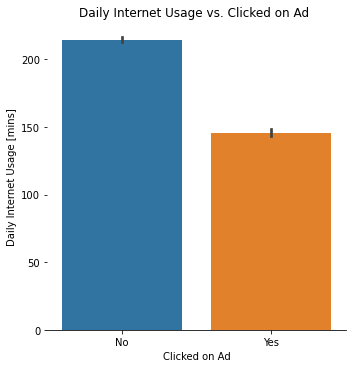

In [27]:
g = sns.catplot(x="Clicked on Ad", y="Daily Internet Usage",
                data=df, kind="bar");

(g.set_axis_labels("Clicked on Ad", "Daily Internet Usage [mins]")
  .set_xticklabels(["No", "Yes"])  
  .set(title="Daily Internet Usage vs. Clicked on Ad ")
  .despine(left=True));

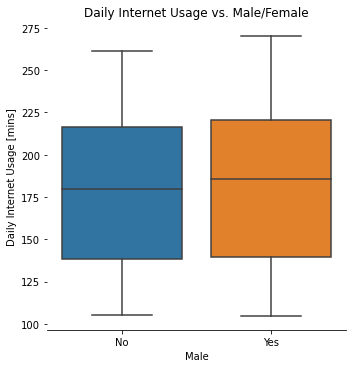

In [28]:
g = sns.catplot(x="Male",y="Daily Internet Usage",data=df, kind="box").set(title="Daily Internet Usage vs. Male/Female");
(g.set_axis_labels("Male", "Daily Internet Usage [mins]")
  .set_xticklabels(["No", "Yes"])
  .despine(left=True));

Males and Females have equal/similar daily internet usage durations

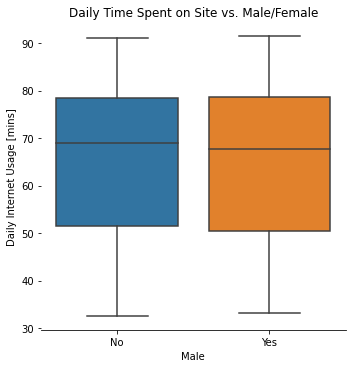

In [29]:
g = sns.catplot(x="Male",y="Daily Time Spent on Site", data=df, kind="box").set(title="Daily Time Spent on Site vs. Male/Female");
(g.set_axis_labels("Male", "Daily Internet Usage [mins]")
  .set_xticklabels(["No", "Yes"])
  .set_titles("Daily Time Spent on Site")
  .despine(left=True));

Males and Females spend equal time on the website

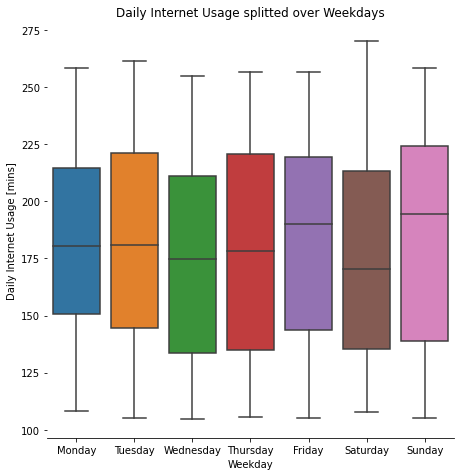

In [30]:
g = sns.catplot(x="Weekday",y="Daily Internet Usage", 
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                data=df, kind="box",height=6.5).set(title="Daily Internet Usage splitted over Weekdays");

(g.set_axis_labels("Weekday", "Daily Internet Usage [mins]")
.despine(left=True));

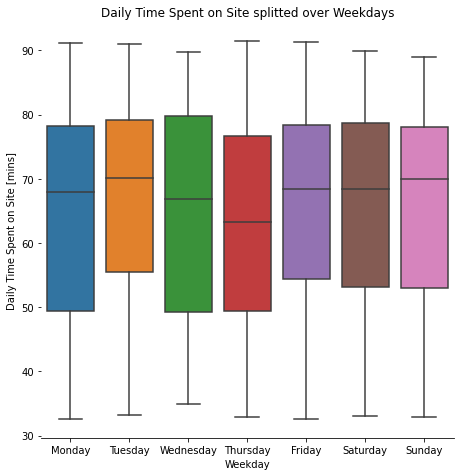

In [31]:
g = sns.catplot(x="Weekday",y="Daily Time Spent on Site", 
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                data=df, kind="box",height=6.5).set(title="Daily Time Spent on Site splitted over Weekdays");

(g.set_axis_labels("Weekday", "Daily Time Spent on Site [mins]")
.despine(left=True));

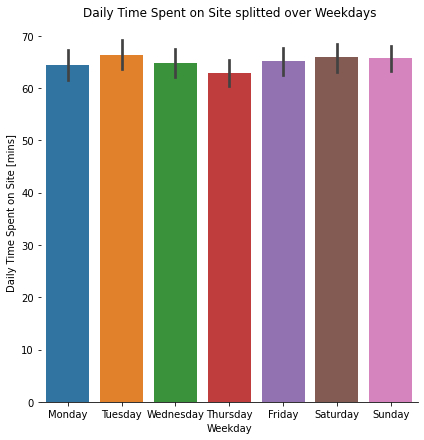

In [32]:
g = sns.catplot(x="Weekday",y="Daily Time Spent on Site", 
            order=['Monday','Tuesday','Wednesday',
                   'Thursday','Friday','Saturday','Sunday'],
                data=df, kind="bar",height=6.0);
(g.set_axis_labels("Weekday", "Daily Time Spent on Site [mins]")
 .set(title="Daily Time Spent on Site splitted over Weekdays")
 .despine(left=True));

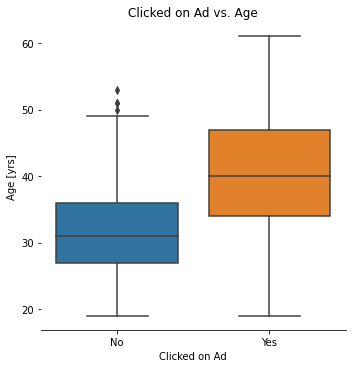

In [33]:
g = sns.catplot(x="Clicked on Ad",y="Age",
                data=df, kind="box");    
(g.set_axis_labels("Clicked on Ad", "Age [yrs]")
  .set_xticklabels(["No", "Yes"])
  .set(title="Clicked on Ad vs. Age")
  .despine(left=True));

- Internet users who don't click on the Ad(s) are in average younger than the users who click on it.

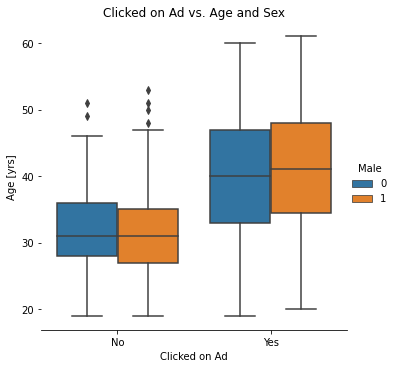

In [34]:
g = sns.catplot(x="Clicked on Ad", y="Age",
                hue="Male",data=df, kind="box");
(g.set_axis_labels("Clicked on Ad", "Age [yrs]")
  .set_xticklabels(["No", "Yes"])
  .set(title="Clicked on Ad vs. Age and Sex")
  .despine(left=True));

- There is no behavior difference between Males and Females, considering the age groups, in regards to their reaction for the Ad(s).

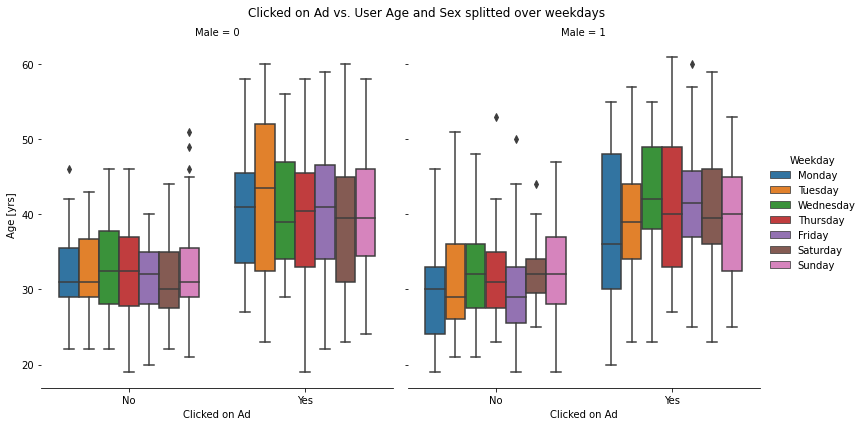

In [35]:
g = sns.catplot(x="Clicked on Ad", y="Age",
                col="Male", hue="Weekday",
                hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                data=df, kind="box",height=6,aspect=0.9);

plt.subplots_adjust(top=0.9)
(g.set_axis_labels("Clicked on Ad", "Age [yrs]")
  .set_xticklabels(["No", "Yes"])  
  .despine(left=True)
  .fig.suptitle('Clicked on Ad vs. User Age and Sex splitted over weekdays')
);

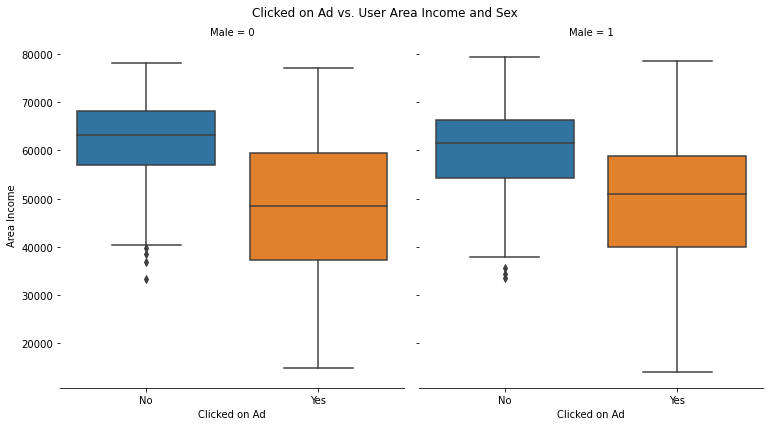

In [36]:
g = sns.catplot(x="Clicked on Ad", y="Area Income",
                col="Male",data=df, kind="box",height=6,aspect=0.9);

plt.subplots_adjust(top=0.9)
(g.set_axis_labels("Clicked on Ad", "Area Income")
  .set_xticklabels(["No", "Yes"])
  .despine(left=True)
  .fig.suptitle('Clicked on Ad vs. User Area Income and Sex')
);

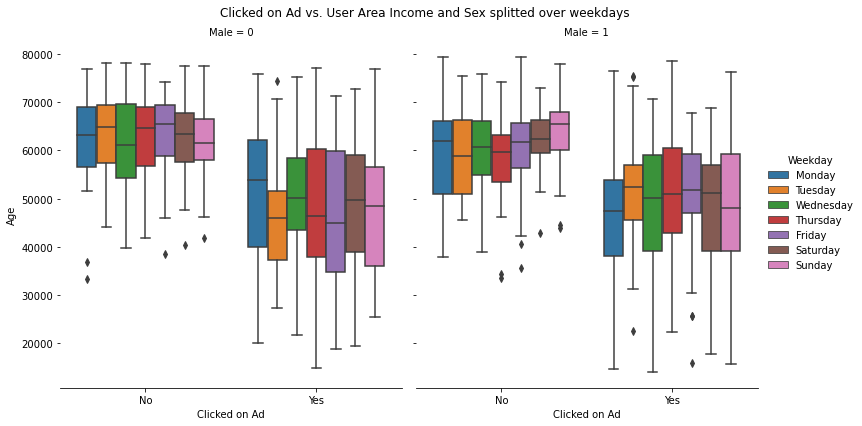

In [37]:
g = sns.catplot(x="Clicked on Ad", y="Area Income",
                col="Male", hue="Weekday",
                hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                data=df, kind="box",height=6,aspect=0.9);

plt.subplots_adjust(top=0.9)
(g.set_axis_labels("Clicked on Ad", "Age")
  .set_xticklabels(["No", "Yes"])
  .despine(left=True)
  .fig.suptitle('Clicked on Ad vs. User Area Income and Sex splitted over weekdays')
);

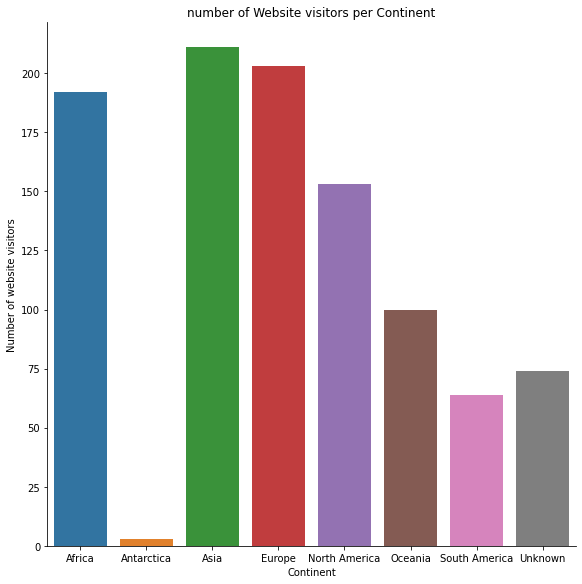

In [38]:
g = sns.catplot(x="Continent",data=df, kind="count", height = 8);
(g.set(title="number of Website visitors per Continent")
 .set_axis_labels("Continent", "Number of website visitors")
);

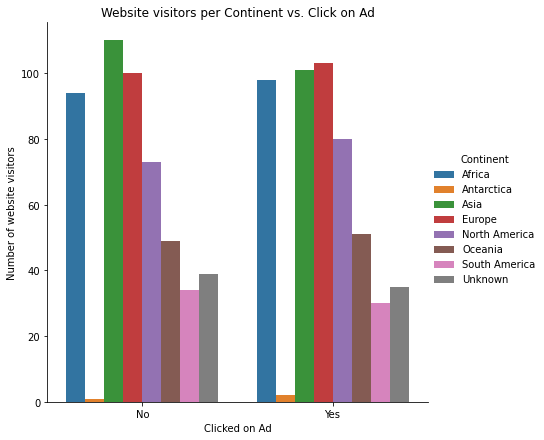

In [39]:
g = sns.catplot(x="Clicked on Ad",hue="Continent",data=df, kind="count", height = 6);
(g.set(title="Website visitors per Continent vs. Click on Ad")
 .set_axis_labels("Clicked on Ad", "Number of website visitors")
 .set_xticklabels(["No", "Yes"])
);

- The majority of the website visitors are from Asia and Europe followed by Africa.
- The visitors behavior from each continent is almost equally split between Clicked on Ad(s) (No/Yes)

#### Aufgabe

Erstellen Sie für das gesamte DataFrame einen Pairplot, wobei Sie die Labels für die Farbgebung verwenden.

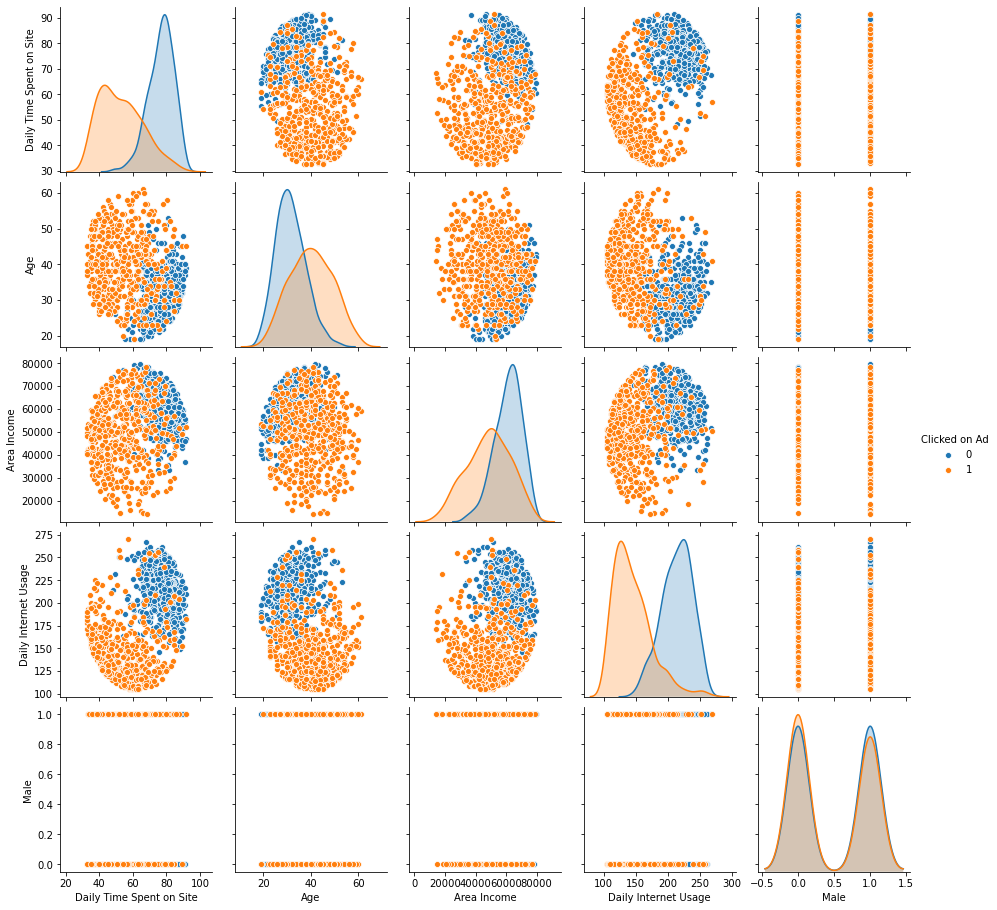

In [40]:
sns.pairplot(df,hue='Clicked on Ad');

- The pair plot shows that most of the features have different distributions/behavior for the two groups (Clicked/Not_Clicked)
- Only the feature **Male** does not show any difference

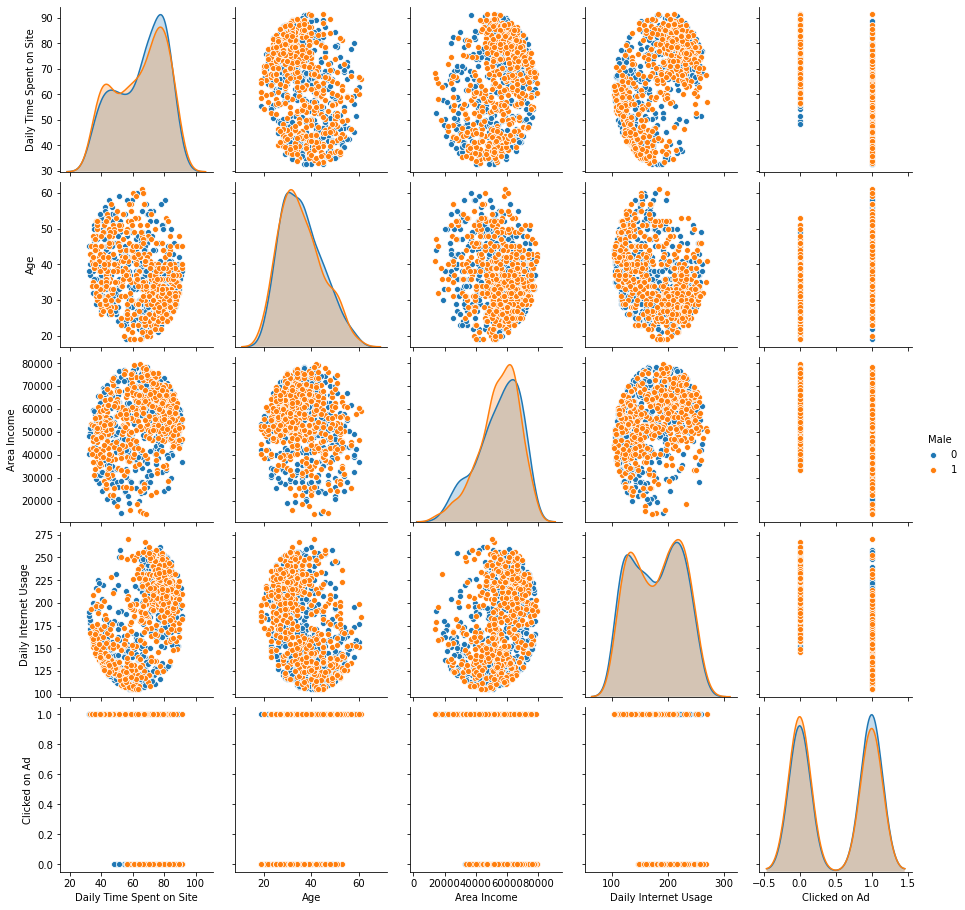

In [41]:
sns.pairplot(df,hue='Male');

- The pairplot above, confirms the observation made from the first pairplot. There are no differences in the features when classified between Male/Female.

#### Aufgabe

Erzeugen Sie eine Korrelationsmatrix auf Basis einer Heatmap. Bedenken Sie bitte, dass nominale Merkmale dabei Probleme machen. Sie können die betreffenden Merkmale vorübergehend aus dem DataFrame entfernen.

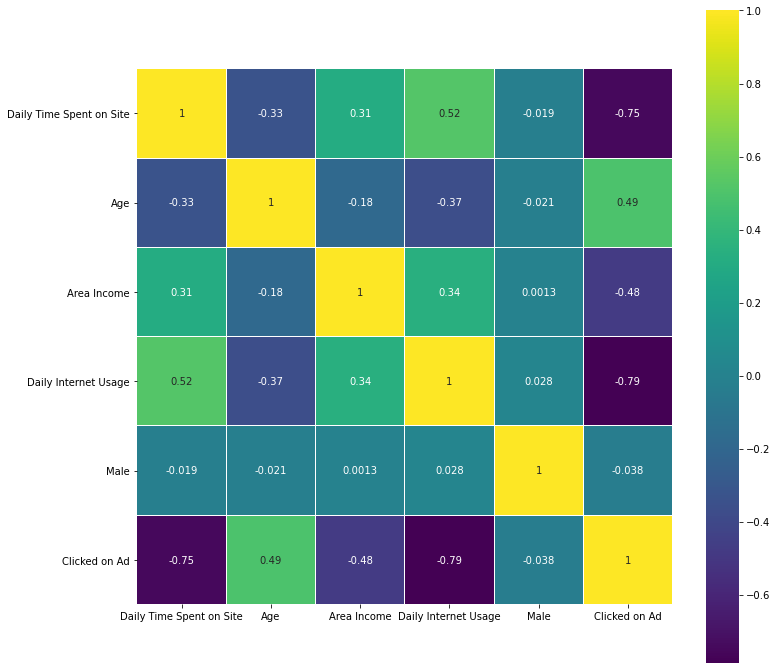

In [42]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Clicked on Ad']].astype(float).corr(),linewidths=0.1,
            vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

### Feature Selection

#### Aufgabe

Wählen Sie auf Basis der Exploration nun die Merkmale aus, die Sie in Ihre Untersuchen einbeziehen wollen.

In [43]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


Features **Daily Time Spent on Site** und **Daily Internet Usage** are correlated, therefore we have trained two seperate models (model 1: using **Daily Time Spent on Site** and model 2: using **Daily Internet Usage**) and compared the score values

In [44]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income']].values
y = df['Clicked on Ad'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

from sklearn.linear_model import LogisticRegression as logit

logitmodel = logit(random_state=0)

logitmodel.fit(X_train, y_train)

print(logitmodel.score(X_test, y_test))

print(logitmodel.coef_)

0.884
[[-1.07809397e-01  2.51432010e-01 -3.30540722e-05]]


In [45]:
X = df[[ 'Age', 'Area Income', 'Daily Internet Usage']].values
y = df['Clicked on Ad'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

from sklearn.linear_model import LogisticRegression as logit

logitmodel = logit(random_state=0)

logitmodel.fit(X_train, y_train)

print(logitmodel.score(X_test, y_test))

print(logitmodel.coef_)
print(logitmodel.intercept_)

0.888
[[ 2.38091096e-01 -2.92624159e-05 -3.79511144e-02]]
[0.00383651]


For the following analysis only the features given below were selected for training our model:  
- Daily Time Spent on Site: We considered this feature to be more relevant for the analysis we intend to conduct.  
- Age
- Area Income

The feature **Male** was not selected since it showed a weak correlation to the behavior of the website visitors in regard to clicking or not clicking on the Ad(s).

### Vorbereiten der Daten

#### Aufgabe

Teilen Sie Ihre Daten in Trainings- und Testset auf. Eine Cross-Validation findet nicht statt. Auch eine Standardisierung ist nicht nötig.

In [46]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income']].values
y = df['Clicked on Ad'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [48]:
#### Standarizierun (Pre-Procesing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Training des Modells

#### Aufgabe

Wählen Sie nun Ihr Modell aus und führen die notwendigen Importe durch. Es soll eine logistische Regression durchgfeührt werden, wobei nur ein linearer Classifier zum Einsatz kommen soll. Sie können also von einer nicht-gekrümmten Decision Boundary ausgehen.

In [49]:
from sklearn.linear_model import LogisticRegression as logit

logitmodel = logit(random_state=0)

#### Aufgabe

Trainieren Sie Ihr Modell.

In [50]:
logitmodel.fit(X_train_std, y_train)

LogisticRegression(random_state=0)

In [51]:
logitmodel.score(X_test_std, y_test)

0.912

In [52]:
logitmodel.coef_

array([[-3.1291158 ,  1.35783719, -1.3399501 ]])

In [53]:
logitmodel.intercept_

array([0.91426185])

### Validierung und Auswertung

#### Aufgabe

Wenden Sie nun Ihr Modell auf die Testdaten an und erzeugen sich Vorhersagen. Legen Sie die Vorhersagen am besten in einer Variablen ab.

In [54]:
predictions = logitmodel.predict(X_test_std)
predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0])

#### Aufgabe

Erzeugen Sie sich einen Klassifikationsreport, um Ihr Modell zu validieren.

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       117
           1       0.94      0.89      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



#### Aufgabe

Untersuchen Sie nun die Klassifikation visuell, indem Sie mehrere Plots erstellen, mit denen Sie die verschiedenen Merkmale gegeneinander untersuchen (2D-Plots!!!!). Nutzen Sie das Modul **Plot-Classifier** (helper.py), um sich in diesen Scatterplots die **Decision Boundary** einzeichnen zu lassen.

In [56]:
# import importlib.machinery
# modulename = importlib.machinery.SourceFileLoader('helper','/Users/danielkromer/Desktop/Big Data Analytics/Woche 3/05 Freitag/helper.py').load_module()

from helper import plot_classifier

#### 'Age' und 'Area Income'

In [57]:
X = df[['Age', 'Area Income']].values
y = df['Clicked on Ad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

logitmodel1 = logit(random_state=0)

# Preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

logitmodel1.fit(X_train_std, y_train)

print(logitmodel1.score(X_test_std, y_test))

print(logitmodel1.coef_)

0.828
[[ 1.34613217 -1.32776685]]


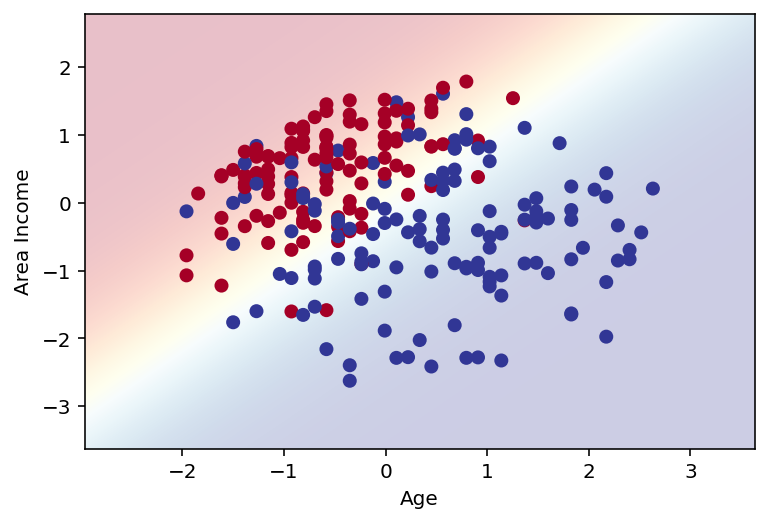

In [58]:
plot_classifier(logitmodel1, X_test_std, y_test, proba = True, xlabel = "Age", ylabel = "Area Income")

####  'Age'  und 'Daily Internet Usage'

In [80]:
X = df[['Age', 'Daily Time Spent on Site']].values
y = df['Clicked on Ad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

logitmodel2 = logit(random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

logitmodel2.fit(X_train_std, y_train)

print(logitmodel2.score(X_test_std, y_test))

print(logitmodel2.coef_)

0.9
[[ 1.26773576 -2.99601844]]


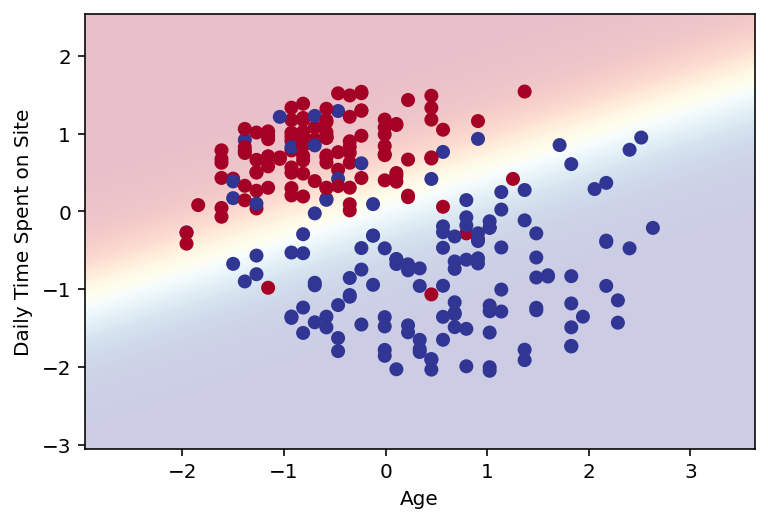

In [81]:
plot_classifier(logitmodel2, X_test_std, y_test, proba = True, xlabel = "Age", ylabel = "Daily Time Spent on Site")

#### 'Area Income' und 'Daily Time Spent on Site'

In [61]:
X = df[['Area Income', 'Daily Time Spent on Site']].values
y = df['Clicked on Ad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

logitmodel3 = logit(random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

logitmodel3.fit(X_train_std, y_train)

print(logitmodel3.score(X_test_std, y_test))

print(logitmodel3.coef_)

0.888
[[-1.20646073 -3.02661727]]


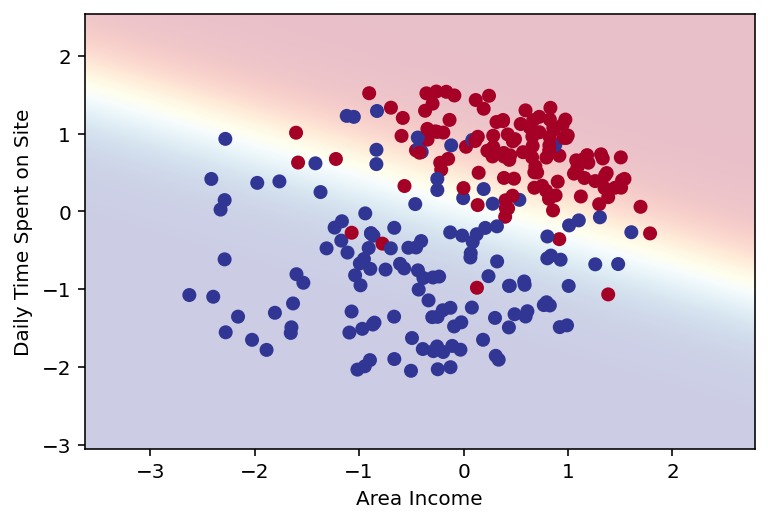

In [62]:
plot_classifier(logitmodel3, X_test_std, y_test, proba = True, xlabel = "Area Income", ylabel = "Daily Time Spent on Site")

### Customer Segmentation

#### Customers who clicked on Ad

In [63]:
X = df[['Age', 'Area Income', 'Daily Time Spent on Site']][df['Clicked on Ad']==1].values
y = df['Clicked on Ad'].values

In [64]:
from sklearn.cluster import KMeans

In [65]:
cluster_range = range(1,10)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

In [66]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

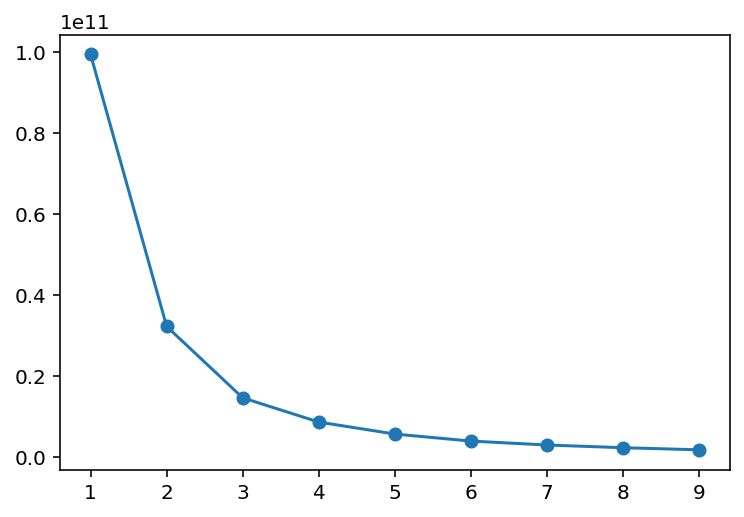

In [67]:
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o');

In [68]:
means = KMeans(n_clusters=3)
means.fit(X)
y_kmeans = means.predict(X)

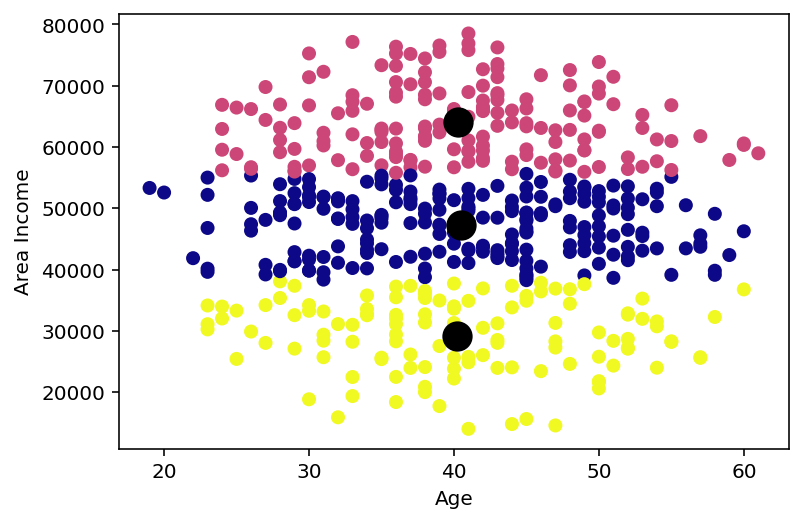

In [69]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
plt.xlabel('Age');
plt.ylabel('Area Income');

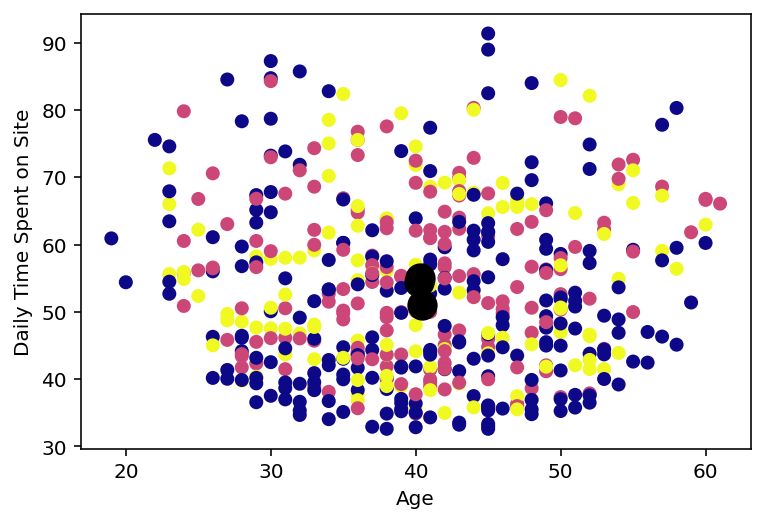

In [70]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200);
plt.xlabel('Age');
plt.ylabel('Daily Time Spent on Site');

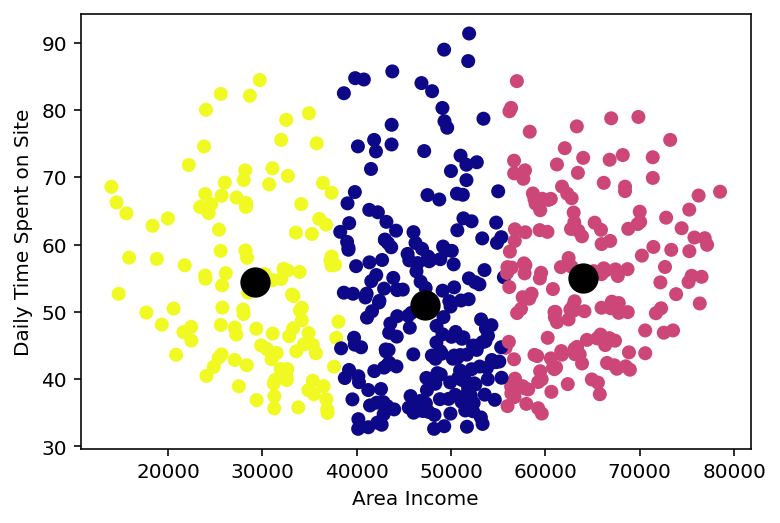

In [71]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 1], X[:, 2], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200);
plt.xlabel('Area Income');
plt.ylabel('Daily Time Spent on Site');

#### Customers who didn't click on Ad

In [82]:
X = df[['Age', 'Area Income', 'Daily Time Spent on Site']][df['Clicked on Ad']==0].values
y = df['Clicked on Ad'].values

In [83]:
cluster_range = range(1,10)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

In [84]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3.956191e+10
1,2,1.361207e+10
2,3,6.983256e+09
3,4,4.173448e+09
4,5,2.670789e+09
5,6,1.866645e+09
6,7,1.437573e+09
7,8,1.023232e+09
8,9,8.183021e+08


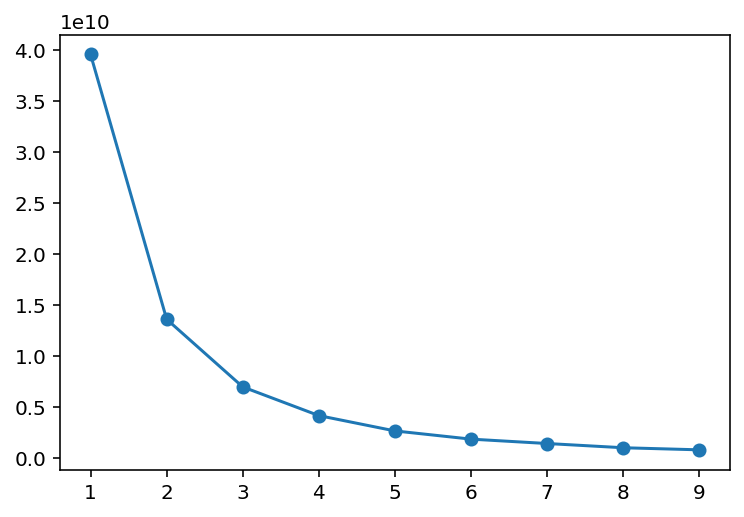

In [85]:
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o');

In [86]:
means = KMeans(n_clusters=3)
means.fit(X)
y_kmeans = means.predict(X)

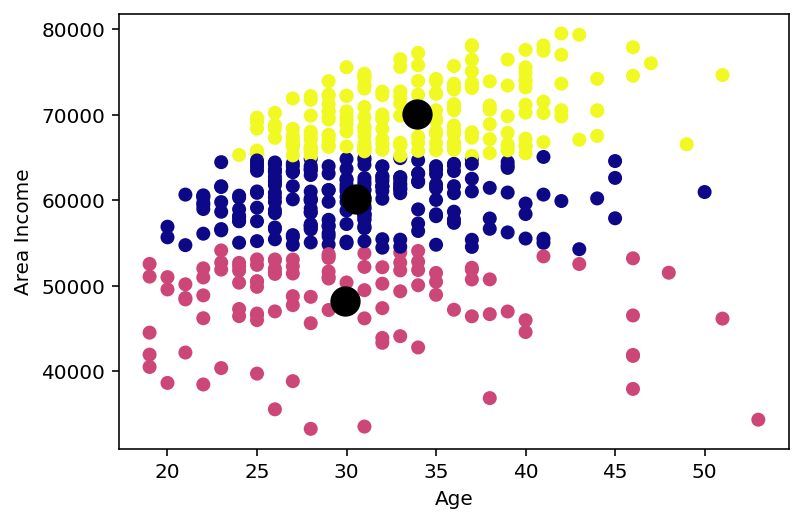

In [87]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
plt.xlabel('Age');
plt.ylabel('Area Income');

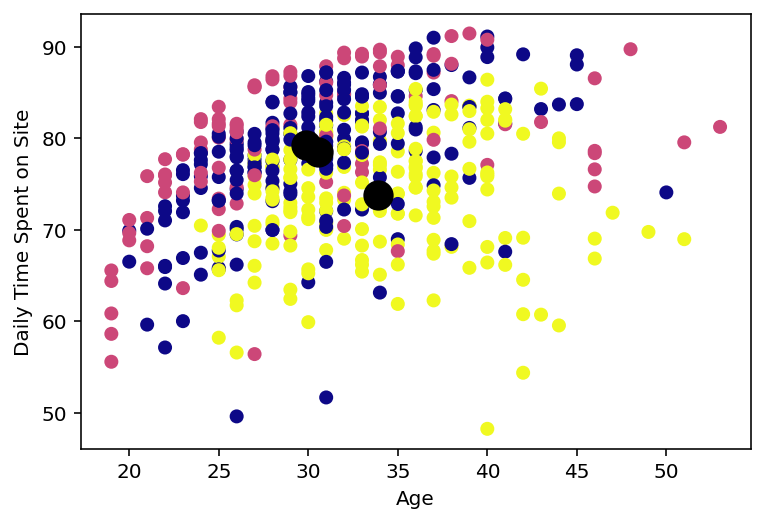

In [88]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200);
plt.xlabel('Age');
plt.ylabel('Daily Time Spent on Site');

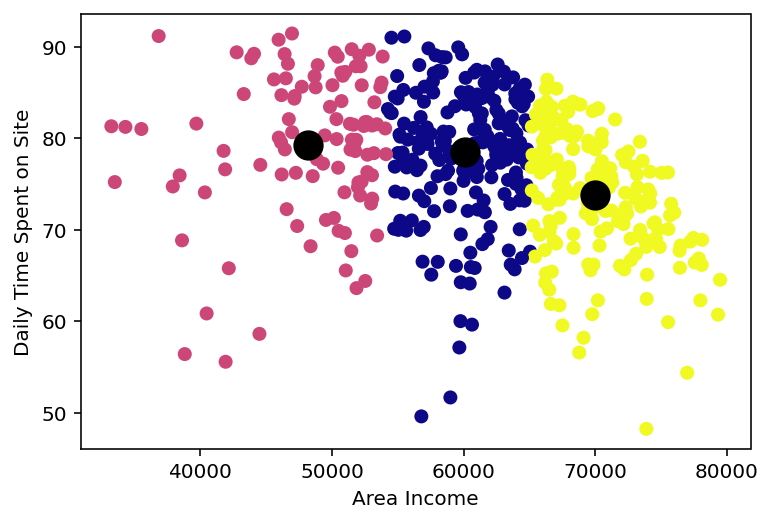

In [89]:
centers = means.cluster_centers_
centers
plt.scatter(X[:, 1], X[:, 2], c=y_kmeans,cmap='plasma');
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200);
plt.xlabel('Area Income');
plt.ylabel('Daily Time Spent on Site');

### <u>Präsentation:</u> Schlussfolgerungen und Empfehlungen

Nachdem Sie Ihre Untersuchung erfolgreich abgeschlossen haben, müssen Sie sich Gedanken machen, welche Lehren Sie daraus ziehen ("Lessons learned").

#### Aufgabe

Beraten Sie Ihren Auftraggeber:
- Was haben Sie im Laufe der Untersuchung festgestellt?
- Was können Sie über die kritischen Nutzereigenschaften aussagen?
- Welche Merkmalsausprägungen führen zu Clicks?
- Was können Sie für die Zukunft empfehlen, d.h.
- Welche Veränderungen sollten vorgenommen werden?

Zusammenfassung Ergebnisse

- Kaum Geschlechterunterscheidung
- Ältere laute zeigen sich interessierter bei den Werbebannern
- Personen mit geringeren Einkommen zeigen größeres Interesse
- Starke Korrelation zw. Daily Time Spent on Time und Daily Internet Usage
- Über die Woche ähnliches Nutzungsverhalten
- Website Besuch sowie Klickrate am höchsten morgens (6-12) und nachts (22-6)
- Mehr Zeit im Internet bzw. auf der relevanten Website führt nicht zu mehr Klicks auf die Werbebanner
- Die Regressionsanalyse zeigt, das 91 % (wenn standardiert) des Models basierend auf den verwendeten Variablen erklärt wird
- Clusteranalyse identifiziert drei Gruppen, die heterogen zueinander sind, doch relativ homogen in sich selbst

Weitere Analyse Vorschläge

- Wochentage und Tageszeiten könnten verkodiert werden, um diese in die Regression mit einzubeziehen
- Kontinente in weitere Analysen mit einzubeziehen
- Analyse auf Länder und / oder Städtebasis bei größeren Datensatz
- Natural Language Processing:  Verwendung der „Ad Topic Line“ Daten.  Analyse welche Worte bzw. Wortpaare am häufigsten angeklickt werden


Empfehlungen

- Stärkere geschlechterspezifische Werbebanner 
- Potenzial der jungen Menschen nutzen, da diese deutlich mehr Zeit im Internet verbringen
- Höhere Einkommensschichten abschöpfen mit aufgewerteter Ansprache
- Zwischen 6 und 12 Uhr bzw. Nachts zw. 22 und 6 Uhr Werbebanner schalten, meiste Frequenz auf Website und höchste Klickrate
- Asien und Europa stärker ausspielen, sind die aktivsten Weltregionen
- Potenziale in Südamerika nutzen
